# Appendice A: Codici Python

## Modelli

### Regressione multinomiale

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
#carico il file
data = pd.read_excel("C:\\Users\\emanu\\Desktop\\Multinomiale_finale.xlsx", sheet_name="Data_Regressione")
print(data.shape)

(7489, 37)


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data.columns

Index(['id', 'Mood', 'AccessibilitàReperibilità', 'Accessoalcredito',
       'Affidabilitàdellabanca', 'Affidabilitàsicurezzasitoapp',
       'Ambientefiliale', 'Assenzasportello', 'ATM', 'BancomatCartadicredito',
       'Burocrazia', 'Chiarezzainformazioni', 'CompetenzaProfessionalità',
       'Costi', 'Curadelcliente', 'Disponibilitàsitoapp',
       'DisponibilitàCortesia', 'Generico', 'Immaginedellabanca',
       'Innovatività', 'Modificacondizioni', 'ProblemsolvingProattività',
       'Qualitàdelservizio', 'RelazioneconDAG', 'Assistenzachattelefono',
       'Tempistiche', 'Trasparenzachiarezza', 'Usability', 'TERESA',
       'IMPIEGATOPA', 'IMPRENDITORE', 'MILITARE', 'OPERAIO', 'PENSIONATO',
       'ZonaGialla', 'ZonaArancione', 'ZonaRossa'],
      dtype='object')

In [5]:
y = data.loc[:,'Mood']
x = data.loc[:,'AccessibilitàReperibilità':]

In [6]:
data.loc[:,'Mood'].value_counts()

gioia        3629
paura        1634
sorpresa      832
disgusto      600
rabbia        526
tristezza     268
Name: Mood, dtype: int64

In [7]:
Nomi_variabili =data.columns[2:]
Nomi_variabili

Index(['AccessibilitàReperibilità', 'Accessoalcredito',
       'Affidabilitàdellabanca', 'Affidabilitàsicurezzasitoapp',
       'Ambientefiliale', 'Assenzasportello', 'ATM', 'BancomatCartadicredito',
       'Burocrazia', 'Chiarezzainformazioni', 'CompetenzaProfessionalità',
       'Costi', 'Curadelcliente', 'Disponibilitàsitoapp',
       'DisponibilitàCortesia', 'Generico', 'Immaginedellabanca',
       'Innovatività', 'Modificacondizioni', 'ProblemsolvingProattività',
       'Qualitàdelservizio', 'RelazioneconDAG', 'Assistenzachattelefono',
       'Tempistiche', 'Trasparenzachiarezza', 'Usability', 'TERESA',
       'IMPIEGATOPA', 'IMPRENDITORE', 'MILITARE', 'OPERAIO', 'PENSIONATO',
       'ZonaGialla', 'ZonaArancione', 'ZonaRossa'],
      dtype='object')

In [8]:
lr = LogisticRegression(multi_class='multinomial')

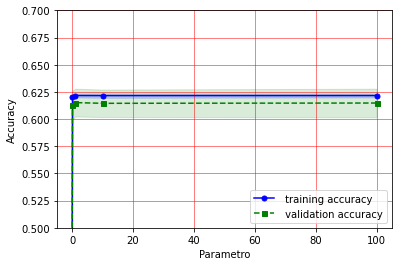

In [9]:
param_range = [100,10, 1, 0.1, 0.001, 0.0000001, 0.00000000000001]

from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve( estimator= lr, X = x, y= y,param_name='C', 
                                             param_range=param_range, cv=10)

train_mean = np.mean( train_scores, axis=1)
train_std=np.std(train_scores, axis=1)
test_std= np.std(test_scores, axis=1)
test_mean= np.mean(test_scores, axis=1)

plt.plot(param_range, train_mean, color="blue", marker="o", markersize=5, label=" training accuracy")
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color="blue")

plt.plot(param_range, test_mean, color="green", linestyle="--",marker="s", markersize=5, label=" validation accuracy")
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color="green")

plt.grid(color='r', linewidth=0.5)
plt.legend( loc="lower right")
plt.xlabel ("Parametro")
plt.ylabel ("Accuracy")

plt.ylim([0.5,0.7])
plt.show()

In [10]:
lr.fit(x,y)
lr.score(x,y)

0.6218453732140473

In [11]:
lr.predict_proba(x)

array([[1.45182008e-03, 9.29932691e-01, 5.00917666e-02, 9.13881810e-04,
        1.67465773e-02, 8.63263485e-04],
       [1.06808919e-02, 8.76514648e-01, 8.38615293e-02, 2.85363823e-03,
        2.27578591e-02, 3.33143365e-03],
       [2.26843548e-01, 6.10631683e-03, 2.21968123e-01, 3.60281782e-01,
        5.52911399e-03, 1.79271116e-01],
       ...,
       [4.06469013e-01, 8.40723368e-03, 3.17538877e-01, 1.46933573e-01,
        1.59770620e-02, 1.04674241e-01],
       [5.70116862e-02, 4.66871265e-01, 2.94941308e-01, 5.00494286e-02,
        8.98127851e-02, 4.13135268e-02],
       [4.27342440e-01, 4.55777950e-03, 9.37404799e-02, 1.71130002e-01,
        2.14799625e-01, 8.84296732e-02]])

In [12]:
data['previsione_disgusto'] = lr.predict_proba(x)[:,0]
data['previsione_gioia'] = lr.predict_proba(x)[:,1]
data['previsione_paura'] = lr.predict_proba(x)[:,2]
data['previsione_rabbia'] = lr.predict_proba(x)[:,3]
data['previsione_sorpresa'] = lr.predict_proba(x)[:,4]
data['previsione_tristezza'] = lr.predict_proba(x)[:,5]
data['previsione'] = lr.predict(x)
data.head()

,id,Mood,AccessibilitàReperibilità,Accessoalcredito,Affidabilitàdellabanca,Affidabilitàsicurezzasitoapp,Ambientefiliale,Assenzasportello,ATM,BancomatCartadicredito,...,ZonaGialla,ZonaArancione,ZonaRossa,previsione_disgusto,previsione_gioia,previsione_paura,previsione_rabbia,previsione_sorpresa,previsione_tristezza,previsione
0,4,gioia,0,0,0,0,0,0,0,0,...,0,0,1,0.001452,0.929933,0.050092,0.000914,0.016747,0.000863,gioia
1,6,gioia,0,0,0,0,0,0,0,0,...,0,0,1,0.010681,0.876515,0.083862,0.002854,0.022758,0.003331,gioia
2,26,disgusto,0,0,0,0,0,0,1,0,...,0,0,1,0.226844,0.006106,0.221968,0.360282,0.005529,0.179271,rabbia
3,28,gioia,0,0,0,0,0,0,0,0,...,0,0,1,0.018307,0.864024,0.086931,0.004044,0.021783,0.004910,gioia
4,33,gioia,0,0,0,0,0,0,0,0,...,0,0,1,0.001452,0.929933,0.050092,0.000914,0.016747,0.000863,gioia


In [13]:
lr.coef_

array([[ 8.08100982e-01,  6.90692241e-01, -2.73547225e-01,
         2.05552628e-01,  1.20038547e+00,  7.81049816e-01,
         8.16973032e-01,  7.65133224e-01,  1.12900237e+00,
         3.65305601e-01, -1.98588535e-01,  1.06019212e+00,
        -4.92418481e-02,  3.03008838e-01, -4.51789529e-01,
        -1.57555998e+00, -2.29159143e-01, -5.09937704e-01,
         5.05343806e-01,  1.67957106e-01, -1.24519958e-01,
         5.70827478e-01,  8.17915825e-01,  8.47970097e-01,
         2.38010067e-01, -2.60783920e-02, -8.72425431e-01,
        -7.20987381e-01, -1.78963659e-01, -6.47642058e-01,
        -1.34865929e-01, -3.30000561e-01, -1.31226496e-01,
         1.48002592e-02,  1.08840558e-01],
       [-2.12933543e+00, -1.34053655e+00,  1.16152156e+00,
         7.69261819e-01, -7.51310761e-01, -1.24140154e+00,
        -1.67620630e+00, -1.89586119e+00, -1.97811366e+00,
        -3.56764460e-01,  1.78745803e-01, -5.27639984e-01,
        -5.12228908e-02, -7.10714672e-01,  4.87359409e-01,
         3.06

In [14]:
Odds = np.exp(lr.coef_)

In [15]:
data_odds = pd.DataFrame()
data_odds['Variabili'] = Nomi_variabili
data_odds['Odds'] = Odds[0]
data_odds

,Variabili,Odds
0,AccessibilitàReperibilità,2.243643
1,Accessoalcredito,1.995096
2,Affidabilitàdellabanca,0.760676
3,Affidabilitàsicurezzasitoapp,1.228204
4,Ambientefiliale,3.321397
5,Assenzasportello,2.183764
6,ATM,2.263637
7,BancomatCartadicredito,2.149281
8,Burocrazia,3.092570
9,Chiarezzainformazioni,1.440954


<AxesSubplot:xlabel='Variabili', ylabel='Odds'>

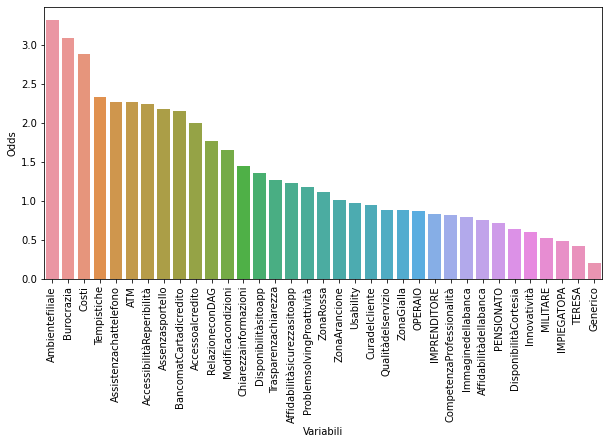

In [16]:
data_odds.sort_values(by = ['Odds'], inplace=True,ascending = False)
plt.figure(figsize = (10,5))

plt.xticks (rotation = 90)
sns. barplot(x = 'Variabili', y = 'Odds', data = data_odds)

In [17]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(data.Mood,data.previsione)
def plot_confusion_matrix(cm,  classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    im = plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(im, fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

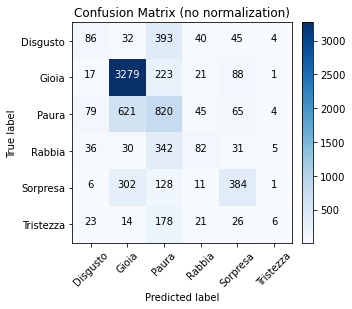

In [18]:
import itertools

plt.figure(figsize=(5,5))
plot_confusion_matrix(matrix, classes=['Disgusto','Gioia', 'Paura', 'Rabbia', 'Sorpresa', 'Tristezza'],
                      title='Confusion Matrix (no normalization)')

plt.show()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(data.Mood, data.previsione))

              precision    recall  f1-score   support

    disgusto       0.35      0.14      0.20       600
       gioia       0.77      0.90      0.83      3629
       paura       0.39      0.50      0.44      1634
      rabbia       0.37      0.16      0.22       526
    sorpresa       0.60      0.46      0.52       832
   tristezza       0.29      0.02      0.04       268

    accuracy                           0.62      7489
   macro avg       0.46      0.36      0.38      7489
weighted avg       0.59      0.62      0.59      7489



## Albero decisionale

In [20]:
#carico il file
data = pd.read_excel("C:\\Users\\emanu\\Desktop\\Multinomiale_finale.xlsx", sheet_name="Data_Albero")
print(data.shape)

(7489, 36)


In [21]:
data.columns

Index(['id', 'Mood', 'AccessibilitàReperibilità', 'Accessoalcredito',
       'Affidabilitàdellabanca', 'Affidabilitàsicurezzasitoapp',
       'Ambientefiliale', 'Assenzasportello', 'ATM', 'BancomatCartadicredito',
       'Burocrazia', 'Chiarezzainformazioni', 'CompetenzaProfessionalità',
       'Costi', 'Curadelcliente', 'Disponibilitàsitoapp',
       'DisponibilitàCortesia', 'Immaginedellabanca', 'Innovatività',
       'Modificacondizioni', 'ProblemsolvingProattività', 'Qualitàdelservizio',
       'RelazioneconDAG', 'Assistenzachattelefono', 'Tempistiche',
       'Trasparenzachiarezza', 'Usability', 'TERESA', 'IMPIEGATOPA',
       'IMPRENDITORE', 'MILITARE', 'OPERAIO', 'PENSIONATO', 'ZonaGialla',
       'ZonaArancione', 'ZonaRossa'],
      dtype='object')

In [22]:
y = data.loc[:,'Mood']
x = data.loc[:,'AccessibilitàReperibilità':]

In [23]:
Nomi_variabili =data.columns[2:]
Nomi_variabili

Index(['AccessibilitàReperibilità', 'Accessoalcredito',
       'Affidabilitàdellabanca', 'Affidabilitàsicurezzasitoapp',
       'Ambientefiliale', 'Assenzasportello', 'ATM', 'BancomatCartadicredito',
       'Burocrazia', 'Chiarezzainformazioni', 'CompetenzaProfessionalità',
       'Costi', 'Curadelcliente', 'Disponibilitàsitoapp',
       'DisponibilitàCortesia', 'Immaginedellabanca', 'Innovatività',
       'Modificacondizioni', 'ProblemsolvingProattività', 'Qualitàdelservizio',
       'RelazioneconDAG', 'Assistenzachattelefono', 'Tempistiche',
       'Trasparenzachiarezza', 'Usability', 'TERESA', 'IMPIEGATOPA',
       'IMPRENDITORE', 'MILITARE', 'OPERAIO', 'PENSIONATO', 'ZonaGialla',
       'ZonaArancione', 'ZonaRossa'],
      dtype='object')

In [24]:
albero = DecisionTreeClassifier(max_depth= 3)
albero.fit(x,y) 
albero.score(x,y)

0.5978101215115502

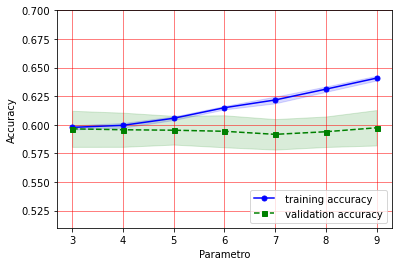

In [25]:
param_range = [3,4,5,6,7,8,9]
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve( estimator= albero, X = x, y= y,param_name='max_depth', 
                                             param_range=param_range, cv=10)

train_mean = np.mean( train_scores, axis=1)
train_std=np.std(train_scores, axis=1)
test_std= np.std(test_scores, axis=1)
test_mean= np.mean(test_scores, axis=1)

plt.plot(param_range, train_mean, color="blue", marker="o", markersize=5, label=" training accuracy")
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color="blue")

plt.plot(param_range, test_mean, color="green", linestyle="--",marker="s", markersize=5, label=" validation accuracy")
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color="green")

plt.grid(color='r', linewidth=0.5)
plt.legend( loc="lower right")
plt.xlabel ("Parametro")
plt.ylabel ("Accuracy")
plt.ylim([0.51,0.7])
plt.show()

In [26]:
importanza = albero.feature_importances_
importanza

array([0.34939611, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00271354, 0.        , 0.        ,
       0.        , 0.00748217, 0.01354834, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.33804556, 0.        ,
       0.        , 0.        , 0.28162875, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00718552, 0.        , 0.        , 0.        ])

In [27]:
Importanza_variabili= pd.DataFrame()
Importanza_variabili ['Variabili'] = Nomi_variabili
Importanza_variabili ['Importanza'] = importanza

In [28]:
data['Previsione_Albero_disgusto'] = albero.predict_proba(x)[:,0]
data['Previsione_Albero_gioia'] = albero.predict_proba(x)[:,1]
data['Previsione_Albero_paura'] = albero.predict_proba(x)[:,2]
data['Previsione_Albero_rabbia'] = albero.predict_proba(x)[:,3]
data['Previsione_Albero_sorpresa'] = albero.predict_proba(x)[:,4]
data['Previsione_Albero_tristezza'] = albero.predict_proba(x)[:,5]
data['Previsione_Albero'] = albero.predict(x)

In [29]:
Importanza_variabili

,Variabili,Importanza
0,AccessibilitàReperibilità,0.349396
1,Accessoalcredito,0.000000
2,Affidabilitàdellabanca,0.000000
3,Affidabilitàsicurezzasitoapp,0.000000
4,Ambientefiliale,0.000000
5,Assenzasportello,0.000000
6,ATM,0.000000
7,BancomatCartadicredito,0.002714
8,Burocrazia,0.000000
9,Chiarezzainformazioni,0.000000


<AxesSubplot:xlabel='Variabili', ylabel='Importanza'>

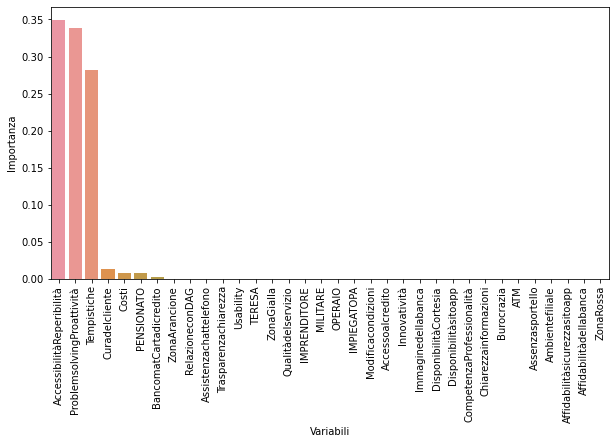

In [30]:
Importanza_variabili.sort_values(by = ['Importanza'], inplace=True,ascending = False)
plt.figure(figsize = (10,5))

plt.xticks (rotation = 90)
sns. barplot(x = 'Variabili', y = 'Importanza', data = Importanza_variabili)

In [31]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix( data.Mood,data.Previsione_Albero)
def plot_confusion_matrix(cm,  classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    im = plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(im, fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

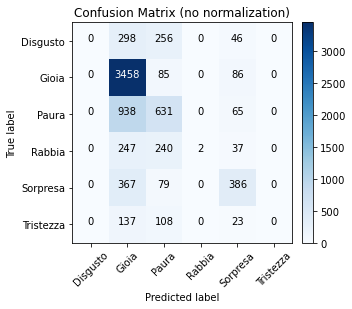

In [32]:
import itertools

plt.figure(figsize=(5,5))
plot_confusion_matrix(matrix, classes=['Disgusto','Gioia', 'Paura', 'Rabbia', 'Sorpresa', 'Tristezza'],
                      title='Confusion Matrix (no normalization)')

plt.show()

In [33]:
from sklearn.metrics import classification_report
print(classification_report(data.Mood, data.Previsione_Albero))

              precision    recall  f1-score   support

    disgusto       0.00      0.00      0.00       600
       gioia       0.64      0.95      0.76      3629
       paura       0.45      0.39      0.42      1634
      rabbia       1.00      0.00      0.01       526
    sorpresa       0.60      0.46      0.52       832
   tristezza       0.00      0.00      0.00       268

    accuracy                           0.60      7489
   macro avg       0.45      0.30      0.28      7489
weighted avg       0.54      0.60      0.52      7489



### Visualizzare Albero

In [34]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
import graphviz 
from IPython.display import display

In [35]:
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(albero, out_file=None
   , feature_names=Nomi_variabili, class_names=['disgusto', 'gioia', 'paura', 'rabbia', 'sorpresa', 'tristezza'] 
   , filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)

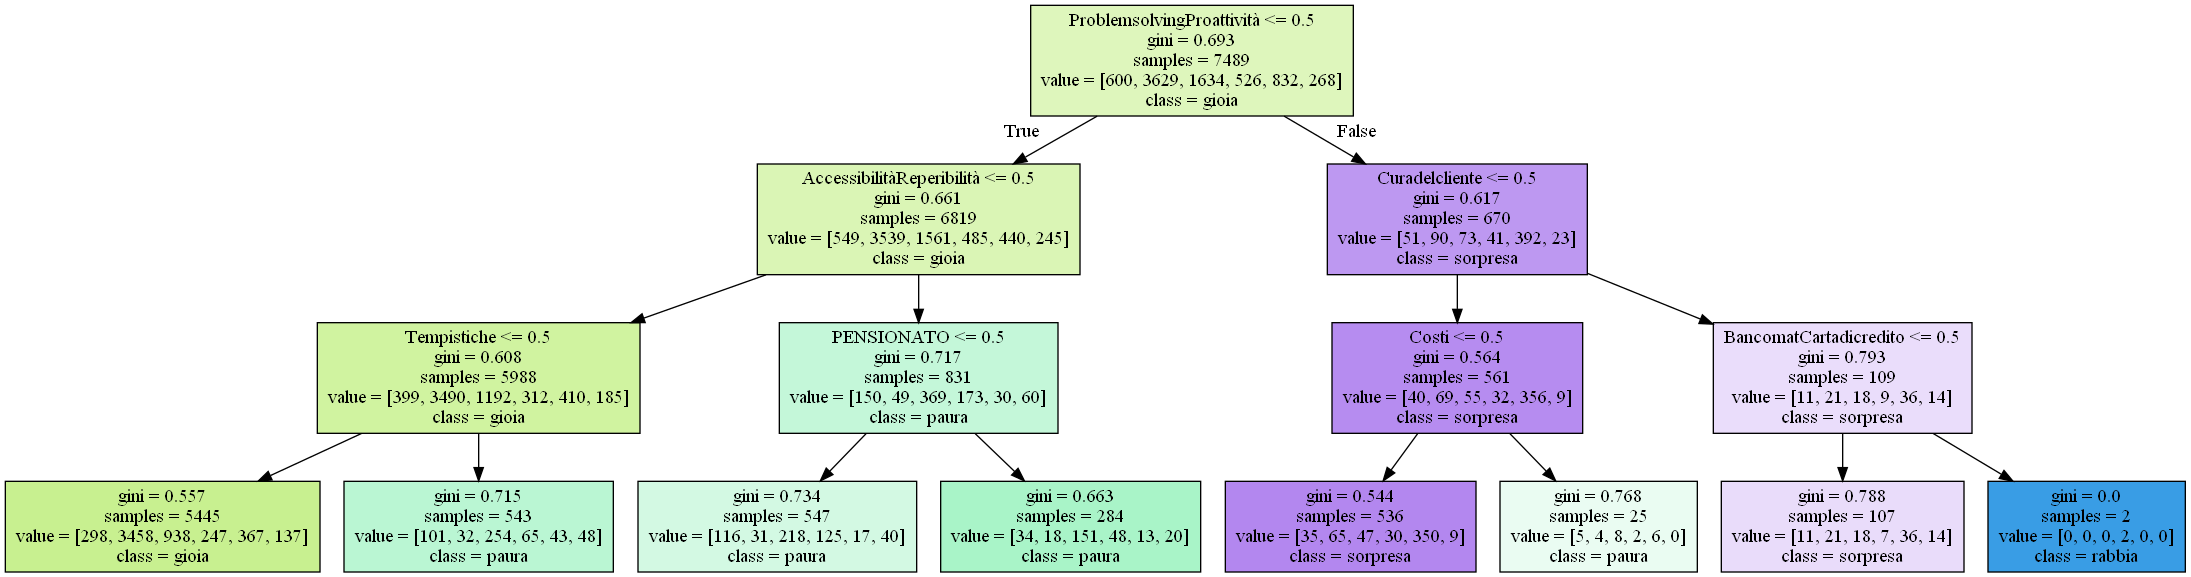

In [36]:
from IPython.display import Image
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## Foreste casuali

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
#carico il file
data = pd.read_excel("C:\\Users\\emanu\\Desktop\\Multinomiale_finale.xlsx", sheet_name="Data_Albero")
print(data.shape)

(7489, 36)


In [39]:
y = data.loc[:,'Mood']
x = data.loc[:,'AccessibilitàReperibilità':]

In [40]:
Nomi_variabili =data.columns[2:]
Nomi_variabili

Index(['AccessibilitàReperibilità', 'Accessoalcredito',
       'Affidabilitàdellabanca', 'Affidabilitàsicurezzasitoapp',
       'Ambientefiliale', 'Assenzasportello', 'ATM', 'BancomatCartadicredito',
       'Burocrazia', 'Chiarezzainformazioni', 'CompetenzaProfessionalità',
       'Costi', 'Curadelcliente', 'Disponibilitàsitoapp',
       'DisponibilitàCortesia', 'Immaginedellabanca', 'Innovatività',
       'Modificacondizioni', 'ProblemsolvingProattività', 'Qualitàdelservizio',
       'RelazioneconDAG', 'Assistenzachattelefono', 'Tempistiche',
       'Trasparenzachiarezza', 'Usability', 'TERESA', 'IMPIEGATOPA',
       'IMPRENDITORE', 'MILITARE', 'OPERAIO', 'PENSIONATO', 'ZonaGialla',
       'ZonaArancione', 'ZonaRossa'],
      dtype='object')

In [41]:
foresta = RandomForestClassifier(n_estimators = 10, max_depth= 3)
foresta.fit(x,y) 
foresta.score(x,y)

0.5310455334490586

In [42]:
Importanza = foresta.estimators_[0].feature_importances_

In [43]:
Importanza_variabili= pd.DataFrame()
Importanza_variabili ['Variabili'] = Nomi_variabili
Importanza_variabili ['Importanza'] = Importanza

<AxesSubplot:xlabel='Variabili', ylabel='Importanza'>

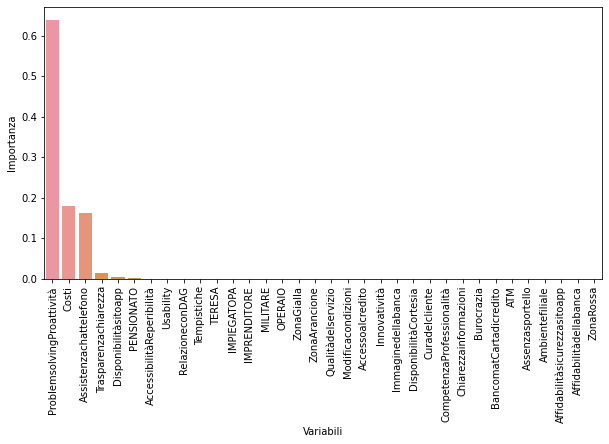

In [44]:
Importanza_variabili.sort_values(by = ['Importanza'], inplace=True,ascending = False)
plt.figure(figsize = (10,5))

plt.xticks (rotation = 90)
sns. barplot(x = 'Variabili', y = 'Importanza', data = Importanza_variabili)

In [45]:
c=0
c=c+1
for tree_in_forest in foresta.estimators_:
    c+=1
    variabile = "albero_forest_" + str(c)
    data[variabile] = tree_in_forest.predict(x)


In [46]:
data.head()

,id,Mood,AccessibilitàReperibilità,Accessoalcredito,Affidabilitàdellabanca,Affidabilitàsicurezzasitoapp,Ambientefiliale,Assenzasportello,ATM,BancomatCartadicredito,...,albero_forest_2,albero_forest_3,albero_forest_4,albero_forest_5,albero_forest_6,albero_forest_7,albero_forest_8,albero_forest_9,albero_forest_10,albero_forest_11
0,4,gioia,0,0,0,0,0,0,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,6,gioia,0,0,0,0,0,0,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,26,disgusto,0,0,0,0,0,0,1,0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0
3,28,gioia,0,0,0,0,0,0,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,33,gioia,0,0,0,0,0,0,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [14]:
data.to_csv('foresta.csv')